In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [219]:
pd.set_option('display.max_columns',100)

In [220]:
data_frame=pd.read_csv('baseball_data.csv')

In [221]:
data_frame.head()

,bip_id,game_date,home_team,away_team,batter_team,batter_name,pitcher_name,batter_id,pitcher_id,is_batter_lefty,is_pitcher_lefty,bb_type,bearing,pitch_name,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
0,20,2020-08-10,COL,ARI,COL,"story, trevor","ray, robbie",596115,592662,0,1,line_drive,left,Changeup,7,1,1,0,1,-0.65,2.09,89.5,105.4,28.0,1
1,22,2020-07-30,ARI,LAD,LAD,"seager, corey","ray, robbie",608369,592662,1,1,line_drive,right,Slider,0,2,0,1,1,-0.26,3.01,84.8,104.9,NaN,1
2,26,2020-07-30,ARI,LAD,LAD,"pollock, aj","ray, robbie",572041,592662,0,1,fly_ball,left,4-Seam Fastball,0,1,2,1,1,-0.42,2.98,92.1,101.7,38.0,1
3,42,2020-08-05,ARI,HOU,HOU,"springer, george","ray, robbie",543807,592662,0,1,line_drive,left,4-Seam Fastball,0,5,0,3,1,-0.40,2.76,94.0,104.5,24.0,1
4,48,2020-08-05,ARI,HOU,HOU,"tucker, kyle","ray, robbie",663656,592662,1,1,line_drive,center,4-Seam Fastball,0,2,0,1,1,-0.04,2.16,93.8,105.4,27.0,1


## Data Preprocessing

### Data Cleaning

### Removing the unwanted columns such as bip_id, batter_name,pitcher_name,game_date

In [222]:
data_frame = data_frame.drop(['bip_id','batter_name','pitcher_name','game_date'],axis=1)

In [223]:
#Removing the duplicate values
data_frame.drop_duplicates(inplace=True)

In [224]:
### Handling missing values

In [225]:
def null_count_gen(data_frame):
    null_count_values=data_frame.isnull().sum().values
    null_count_index = data_frame.isnull().sum().index
    null_count_data = pd.DataFrame({'Column':null_count_index,'Percentage':list(null_count_values/len(data_frame))})
    null_count_data = null_count_data[null_count_data['Percentage']>0].sort_values('Percentage',ascending=False)
    return null_count_data
null_count_data = null_count_gen(data_frame)
null_count_data

,Column,Percentage
18,launch_speed,0.265391
19,launch_angle,0.262098


In [226]:
#imputing the values for launch_speed
data_frame['launch_speed']=data_frame['launch_speed'].fillna(data_frame['launch_speed'].mode()[0],axis=0)

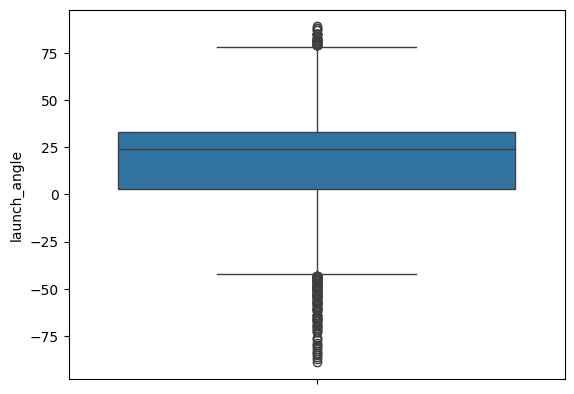

In [227]:
#Checking for launch_angle
sns.boxplot(data_frame['launch_angle']);

In [228]:
#Same for launch_angle, we need to fill the null values using the mode value of the launch_angle column. 
#So, there no more outliers added to the column

In [229]:
#imputing the values for launch_angle
data_frame['launch_angle']=data_frame['launch_angle'].fillna(data_frame['launch_angle'].mode()[0],axis=0)

In [230]:
#handling the missing values for bb_type
data_frame['bb_type'].value_counts()

bb_type
line_drive     2523
fly_ball       2491
ground_ball    2399
popup           481
Name: count, dtype: int64

In [231]:
#replacing the null values in the bb_type column with the most frequent label in bb_type
data_frame['bb_type']=data_frame['bb_type'].fillna('ground_ball').isnull().sum()

In [232]:
#checking the null values again

In [233]:
null_count_gen(data_frame)

,Column,Percentage


In [234]:
#there are no more null values in the dataframe

### Outlier removal

In [235]:
#Checking the outliers in the numerical features
num_data = data_frame.select_dtypes(include=['int','float'])
num_data.head()

,batter_id,pitcher_id,is_batter_lefty,is_pitcher_lefty,bb_type,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
0,596115,592662,0,1,0,7,1,1,0,1,-0.65,2.09,89.5,105.4,28.0,1
1,608369,592662,1,1,0,0,2,0,1,1,-0.26,3.01,84.8,104.9,28.0,1
2,572041,592662,0,1,0,0,1,2,1,1,-0.42,2.98,92.1,101.7,38.0,1
3,543807,592662,0,1,0,0,5,0,3,1,-0.40,2.76,94.0,104.5,24.0,1
4,663656,592662,1,1,0,0,2,0,1,1,-0.04,2.16,93.8,105.4,27.0,1


In [236]:
#we are going to check the outliers only for the continous features

In [237]:
for col in num_data.columns:
    #getting the length of distinct values
    length = len(data_frame[col].value_counts())
    print(f'{col}: {length}')

batter_id: 482
pitcher_id: 601
is_batter_lefty: 2
is_pitcher_lefty: 2
bb_type: 1
park: 30
inning: 13
outs_when_up: 3
balls: 4
strikes: 3
plate_x: 299
plate_z: 321
pitch_mph: 307
launch_speed: 684
launch_angle: 172
is_home_run: 2


In [238]:
#we are going to consider the continous features such as plate_x, plate_z, pitch_mph, launch_speed, launch_angle for checking the outliers

In [239]:
num_cols_to_consider =['plate_x', 'plate_z', 'pitch_mph', 'launch_speed', 'launch_angle']

In [240]:
#Since the values aren't changed before and after transforming the values, we aren't imputing a outlier removal techniques

### Encoding the string features to numericals

In [241]:
object_data=data_frame.select_dtypes(['object'])

In [242]:
object_data.head()

,home_team,away_team,batter_team,bearing,pitch_name
0,COL,ARI,COL,left,Changeup
1,ARI,LAD,LAD,right,Slider
2,ARI,LAD,LAD,left,4-Seam Fastball
3,ARI,HOU,HOU,left,4-Seam Fastball
4,ARI,HOU,HOU,center,4-Seam Fastball


### We will perform label encoding techniques to covert the string values in the string features to numericals

In [243]:
for col  in object_data.columns:
    ranking = data_frame[col].value_counts().index
    mapping = {i:k for k,i in enumerate(ranking,1)}
    data_frame[col] = data_frame[col].map(mapping)
    print(col)
    print('--------')
    print(mapping)
        

home_team
--------
{'LAD': 1, 'OAK': 2, 'HOU': 3, 'ARI': 4, 'SD': 5, 'TEX': 6, 'SEA': 7, 'LAA': 8, 'COL': 9, 'SF': 10, 'TB': 11, 'ATL': 12, 'CLE': 13, 'CIN': 14, 'NYY': 15, 'MIN': 16, 'TOR': 17, 'BOS': 18, 'NYM': 19, 'PHI': 20, 'CWS': 21, 'BAL': 22, 'MIL': 23, 'KC': 24, 'MIA': 25, 'WSH': 26, 'CHC': 27, 'DET': 28, 'PIT': 29, 'STL': 30}
away_team
--------
{'LAD': 1, 'HOU': 2, 'OAK': 3, 'TEX': 4, 'SD': 5, 'ARI': 6, 'COL': 7, 'SEA': 8, 'LAA': 9, 'SF': 10, 'ATL': 11, 'TB': 12, 'CWS': 13, 'TOR': 14, 'MIL': 15, 'MIN': 16, 'NYY': 17, 'KC': 18, 'CHC': 19, 'MIA': 20, 'WSH': 21, 'DET': 22, 'BOS': 23, 'CLE': 24, 'NYM': 25, 'PIT': 26, 'STL': 27, 'PHI': 28, 'BAL': 29, 'CIN': 30}
batter_team
--------
{'COL': 1, 'LAA': 2, 'SD': 3, 'HOU': 4, 'SF': 5, 'LAD': 6, 'ARI': 7, 'SEA': 8, 'TEX': 9, 'OAK': 10, 'TB': 11, 'ATL': 12, 'MIN': 13, 'CWS': 14, 'NYY': 15, 'MIL': 16, 'CIN': 17, 'NYM': 18, 'KC': 19, 'PHI': 20, 'BOS': 21, 'TOR': 22, 'CHC': 23, 'BAL': 24, 'MIA': 25, 'STL': 26, 'PIT': 27, 'DET': 28, 'WSH': 29

### Transforming the data

### Let us use standard scaling for standardization

In [244]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [245]:
x = pd.DataFrame(scaler.fit_transform(data_frame.iloc[:,:-1]),columns = data_frame.iloc[:,:-1].columns)
y = data_frame.iloc[:,-1]

### Feature Selection 

In [246]:
from sklearn.feature_selection import SelectKBest, f_classif

In [247]:
x.shape

(7894, 20)

In [248]:
final_x_data = SelectKBest(f_classif, k=10).fit(x, y)

In [249]:
sort_scores_df=pd.DataFrame({'feature_name':final_x_data.feature_names_in_,'score':final_x_data.scores_}).sort_values('score',ascending=False)

In [250]:
sort_scores_df.head(10)

,feature_name,score
0,home_team,5162.112002
1,away_team,4338.837822
2,batter_team,3775.224807
18,launch_speed,1714.992918
19,launch_angle,454.394250
8,bearing,203.394756
16,plate_z,128.598805
6,is_pitcher_lefty,65.473126
14,strikes,42.867583
10,park,22.753504


In [251]:
list(sort_scores_df.head(10)['feature_name'])

['home_team',
 'away_team',
 'batter_team',
 'launch_speed',
 'launch_angle',
 'bearing',
 'plate_z',
 'is_pitcher_lefty',
 'strikes',
 'park']

In [252]:
final_cols = list(sort_scores_df.head(10)['feature_name'])
print(final_cols)
final_x_data.columns = final_cols
final_x_data_input = x[final_cols]

['home_team', 'away_team', 'batter_team', 'launch_speed', 'launch_angle', 'bearing', 'plate_z', 'is_pitcher_lefty', 'strikes', 'park']


In [253]:
final_data = pd.concat([x[final_cols],y],axis=1)
final_data.to_csv('final_input_data.csv',index=False)

In [254]:
final_data

,home_team,away_team,batter_team,launch_speed,launch_angle,bearing,plate_z,is_pitcher_lefty,strikes,park,is_home_run
0,0.135823,-0.310392,-1.084540,0.763297,0.319626,0.330549,-0.496708,1.409524,-0.098124,-0.959282,1
1,-0.564859,-0.983792,-0.373853,0.726278,0.319626,1.615312,1.188717,1.409524,-0.098124,-1.808714,1
2,-0.564859,-0.983792,-0.373853,0.489354,0.764865,0.330549,1.133757,1.409524,-0.098124,-1.808714,1
3,-0.564859,-0.849112,-0.658128,0.696662,0.141530,0.330549,0.730721,1.409524,-0.098124,-1.808714,1
4,-0.564859,-0.849112,-0.658128,0.763297,0.275102,-0.954214,-0.368469,1.409524,-0.098124,-1.808714,1
...,...,...,...,...,...,...,...,...,...,...,...
7889,2.798414,2.113848,2.753168,0.607816,0.853913,-0.954214,-0.185271,-0.709459,1.129436,-0.716587,0
7890,2.658278,2.113848,2.042481,0.607816,1.165581,1.615312,-0.716546,-0.709459,-0.098124,-1.323324,0
7891,2.658278,2.113848,2.042481,0.200602,-0.081090,-0.954214,-0.624947,-0.709459,1.129436,-1.323324,0
7892,0.696368,2.383207,2.611031,-1.539308,0.319626,1.615312,1.225356,-0.709459,-0.098124,-1.080629,0
